# 5 - Matrices
- 5.1 Interpreting matrices
- 5.2 Matrix terms and notation
- 5.3 Matrix dimensionalities
- 5.4 The transpose operation
- 5.5 Matrix zoology
- 5.6 Matrix addition and subtraction
- 5.7 Scalar-matrix multiplication
- 5.8 Shifting a matrix
- 5.9 Diagonal and trace
- 5.10 Exercises
- 5.11 Answers
- 5.12 Code challenges
- 5.13 Code solutions

Notes, code snippets, and the end of chapter exercises from the book _Linear Algebra: Theory, Intuition, Code_ by Mike X Cohen. 

Find more information about the book on [github](https://github.com/mikexcohen/LinAlgBook) and [amazon](https://www.amazon.com/Linear-Algebra-Theory-Intuition-Code/dp/9083136604).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 5.1 Interpreting Matrices
Applications of matrices
- representing a linear transform or mapping
- storing partial derivatives of a multivariable system
- representing a system of equations
- storing data eg features $\times$ observations
- representing regressors for statistical models
- applying geometric transformations for computer graphics
- applying kernels used in filtering or convolution

## 5.2 Matrix Terms and Notation
Terms
- row
- column
- element
- block
- diagonal
- skew-diagonal
- off-diagonal

## 5.4 The Transpose Operation
Transpose is defined for any rectangular matrix.
$$
A_{i,j} = A^T_{j,i}
$$

Proofs often make use of this fact.
$$
(A^T)^T = A
$$

## 5.5 Matrix zoology

### Square Matrix
A matrix with the number of rows equal to the number of columns.
$$
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix}
$$

### Fat or Wide Matrix
A matrix with number of colums $\gt$ number of rows.
$$
\begin{bmatrix}
a & b & c & d \\
e & f & g & h \\
\end{bmatrix}
$$

### Tall or Skinny Matrix
A matrix with number of rows $\gt$ number of columns.
$$
\begin{bmatrix}
a & b \\
c & d \\
e & f \\
g & h \\
\end{bmatrix}
$$

### Symmetric Matrix
A square matrix with elements $a_{i,j} = a_{j,i}$.
$$
A = A^T
$$

$$
\begin{bmatrix}
0 & a & b \\
a & 0 & c \\
b & c & 0 \\
\end{bmatrix}
$$

Notes
* Entries along the diagonal may not be zero.

Examples
* Covariance matrix
    * $\Sigma = E[(X - \mu) (X - \mu)^T]$
    * Variance appears along the diagonal
    * Covariance between non-diagonal elements is symmetric
    * Imagine sample points from a bivariate Gaussian distribution in which $\sigma$ in each dimension is different

### Skew-Symmetric Matrix
A square matrix with elements $a_{i,j} = -a_{j,i}$.
$$
A = -A^T
$$

$$
\begin{bmatrix}
0 & a & b \\
-a & 0 & c \\
-b & -c & 0 \\
\end{bmatrix}
$$

Notes
* Entries along the diagonal must be zero.

### Identity Matrix
A square matrix often written as $\textbf{I}$ with 1 on the diagonal and 0 everywhere else.
$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

Notes
* Column and row vectors are orthonormal $=>$ identity matrix is an orthogonal matrix.
* Identity matrix is multiplicative identity $AI = A = IA$

### Zero Matrix
A matrix often written as $\textbf{0}$ with elements $a_{i,j} = 0$.
$$
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
$$

Notes
* Zero matrix is additive identity $A + 0 = A = 0 + A$

### ATA Matrix
Matrix product $A^T A$ is one of the most important matrices in linear algebra.

Properties
- Produces a square matrix, even when $A$ is non-square.
- Produces a symmetric matrix, even when $A$ is not symmetric.
- If $A$ is full column-rank, then $A^T A$ is full-rank and the inverse $(A^T A)^{-1}$ exists.
- Has the same row space as $A$.
- Has orthogonal eigenvectors.
- Is positive semi-definite.
- Has non-negative, real-valued eigenvalues.
- If $A$ has zero-mean, then produces covariance matrix.
- Has distinctive appearance when rendered as an image.

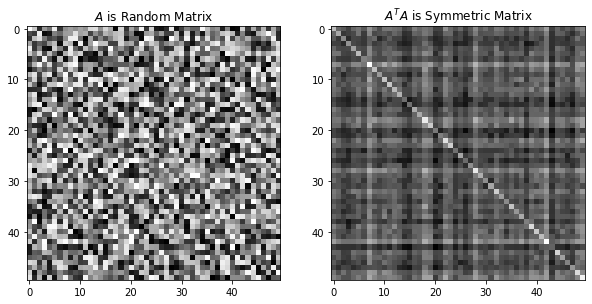

In [2]:
A = np.random.random((50,50))
ATA = A.T @ A

fig1, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].imshow(A, cmap='gray')
axes[0].set_title('$A$ is Random Matrix')
axes[1].imshow(ATA, cmap='gray')
axes[1].set_title('$A^T A$ is Symmetric Matrix')
plt.show()

## 5.5 Matrix zoology (cont'd)

### Diagonal Matrix
A matrix often written as $D$ with zeros along the non-diagonals.

$D$ can be square (top) ...
$$
\begin{bmatrix}
d_1 & 0 & 0 \\
0 & d_2 & 0 \\
0 & 0 & d_3 \\
\end{bmatrix}
$$

... or non-square (bottom).
$$
\begin{bmatrix}
d_1 & 0 & 0 & 0 & 0 \\
0 & d_2 & 0 & 0 & 0 \\
0 & 0 & d_3 & 0 & 0 \\
\end{bmatrix}
$$

Notes
* Transforming a matrix to diagonal form can be achieved through eigendecomposition or singlular value decomposition.
* When diagonal elements all have the same value, then often written as scalar multiple of identity matrix $\lambda I$.
* Hollow matrices are opposite of diagonal matrix and have zeros on diagonals and non-zero off-diagonals.
    * Euclidean distance matrices are often hollow since self-distance is 0.

### Triangular Matrix
A square or rectangular matrix containing non-zero values along the diagonals and upper triangle $U$ or lower triangle $L$.

$$
U =
\begin{bmatrix}
a & b & c \\
0 & d & e \\
0 & 0 & f \\
\end{bmatrix}
$$

$$
L =
\begin{bmatrix}
a & 0 & 0 \\
b & c & 0 \\
d & e & f \\
\end{bmatrix}
$$

$$
a, b, c, d, e, f \neq 0
$$

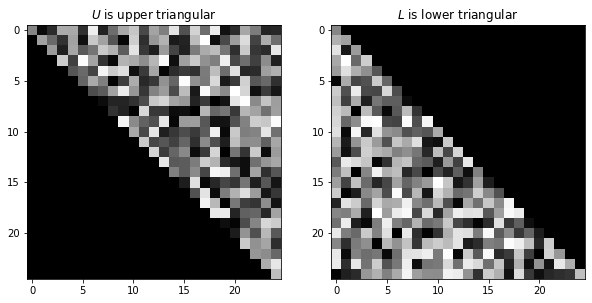

In [3]:
A = np.random.random((25,25))
U = np.triu(A)
L = np.tril(A)

fig1, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].imshow(U, cmap='gray')
axes[0].set_title('$U$ is upper triangular')
axes[1].imshow(L, cmap='gray')
axes[1].set_title('$L$ is lower triangular')
plt.show()

## 5.5 Matrix zoology (cont'd)

### Orthogonal Matrix
A matrix is orthogonal if it satisfies the following 2 criteria:
- All columns are pairwise orthogonal eg dot product between any two columns is 0.
- Each column has unit magnitude.

A more compact expression for these criteria is:
$$
Q^T Q = I
$$

Notes
- The standard mutually orthogonal unit vectors form an orthogonal matrix when concatenated along rows or columns.
- The identity matrix $I$ is an orthogonal matrix.

### Block Matrix
A matrix composed of other matrices is referred to as a block matrix.

$$
\begin{bmatrix}
A & B \\
C & D \\
\end{bmatrix}
$$

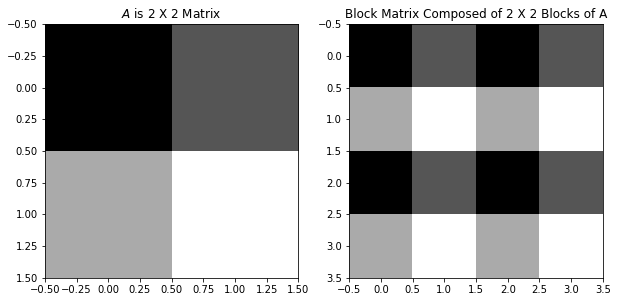

In [4]:
A = np.array([1,2,3,4]).reshape(2,2)
block = np.block([[A,A],[A,A]])

fig1, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].imshow(A, cmap='gray')
axes[0].set_title('$A$ is 2 X 2 Matrix')
axes[1].imshow(block, cmap='gray')
axes[1].set_title('Block Matrix Composed of 2 X 2 Blocks of A')
plt.show()

## 5.5 Matrix zoology (cont'd)

### Toeplitz Matrix
A matrix constructed from row and column vectors in which the descending diagonals are constant value.

$$
\begin{bmatrix}
a & b & c & d \\
b & a & b & c \\
c & b & a & b \\
d & c & b & a \\
\end{bmatrix}
$$

Notes
* Toeplitz matrices are not always symmetric.

In [5]:
def toeplitz(r, c):
    """
    toeplitz returns the toeplitz matrix constructed from row and column vectors
    
    :param r: numpy.ndarray  Row vector.
    :param c: numpy.ndarray  Column vector.
    :return: numpy.ndarray   Toeplitz matrix.
    """
    assert r.ndim == c.ndim == 1
    assert r.dtype == c.dtype

    nrow, ncol = c.shape[0], r.shape[0]
    A = np.empty((nrow,ncol), dtype=r.dtype)
    for i in range(nrow):
        A[i,i:] = r[:ncol-i]
        A[i:,i] = c[:nrow-i]
    
    return A


a = np.array([1,2,3,4], dtype=int)
T = toeplitz(a, a)
print(T)
expected = np.array([[1,2,3,4],[2,1,2,3],[3,2,1,2],[4,3,2,1]], dtype=int)
np.testing.assert_equal(T, expected, "toeplitz, symmetric")

a = np.array([1,4,5,6], dtype=int)
b = np.array([1,2,3], dtype=int)
T = toeplitz(a, b)
print(T)
expected = np.array([[1,4,5,6],[2,1,4,5],[3,2,1,4]], dtype=int)
np.testing.assert_equal(T, expected, "toeplitz, non-symmetric")

[[1 2 3 4]
 [2 1 2 3]
 [3 2 1 2]
 [4 3 2 1]]
[[1 4 5 6]
 [2 1 4 5]
 [3 2 1 4]]


## 5.8 Shifting a Matrix
Shifted matrix $\hat{A}$ is the result of adding a usually small multiple of the identity matrix to the matrix $A$.

$$
\hat{A} = A + \lambda I
$$

Properties
- Only diagonal elements are modified.
- Since shifting only applies to diagonal elements it can make previously identical rows in the matrix slightly different.
  - This helps improve the conditioning of the matrix.

## 5.9 Diagonal and Trace

### Trace
Trace of the matrix $\text{tr}(A)$ is the sum of the diagonal elements.

$$
\text{tr}(A) = \sum_{i=1}^M a_{i,i}
$$

## 5.10 Exercises

3. Work out formulas for the count of elements based on matrix dimension $N$.
- Number of elements: $N^2$
- Number of elements along diagonal: $N$
- Number of elements in upper / lower triangle: $N (N-1) / 2$
    - ... combinatorics: form unique pairs from $N$ and $N-1$

$$
\begin{bmatrix}
a & b & c & d \\
e & f & g & h \\
i & j & k & l \\
m & n & o & p \\
\end{bmatrix}
$$

- Number of elements: $4^2 = 16$
- Number of elements along diagonal: $4$
- Number of elements in upper / lower triangle: $4 (4-1) / 2 = 6$

## 5.12 Code Challenges

> 1. The goal of this exercise is to create a matrix that contains the dot products between all pairs of columns in tow other matrices. First create two $4 \times 2$ matrices of random numbers. Then write a double-for loop in which you compute the dot products between each column of both matrices. The $i,j$ element of the resulting matrix will be the dot product between column $i$ of the first matrix and column $j$ of th second matrix.

In [6]:
def dot_pairwise_column(A, B):
    """
    dot_pairwise_column returns the pairwise dot products of columns of matrices A and B
    
    :param A: numpy.ndarray  Matrix A of dimension m \times n.
    :param B: numpy.ndarray  Matrix B of dimension m \times n.
    :return: numpy.ndarray   Matrix C with pairwise dot products along diagonals.
    """
    assert A.shape == B.shape

    ncol = A.shape[1]
    C = np.zeros((ncol,ncol))
    for i in range(ncol):
        for j in range(ncol):
            C[i,j] = np.dot(A[:,i], B[:,j])
    return C


A = np.stack((np.array([1,2,3,4]),np.array([5,6,7,8])), axis=1)
B = np.stack((np.array([4,3,2,1]),np.array([8,7,6,5])), axis=1)
C = dot_pairwise_column(A, B)
expected = np.array([[20,60],[60,164]])
np.testing.assert_equal(C, expected, "dot_pairwise_column")

> 2. Create a symmetric matrix by starting with a dense random numbers matrix and applying three matrix operations: 
> - convert to triangular form
> - transpose
> - matrix addition

In [7]:
def symmetric(A):
    """
    symmetric creates a symmetric matrix from A using only addition and transpose

    :param A: numpy.ndarray  Matrix A
    :return: numpy.ndarray   Symmetric matrix A.
    """
    S = np.zeros_like(A)
    L, U = np.tril(A), np.triu(A)
    return A + L.T + U.T


A = np.random.random((4,4))
S = symmetric(A)
np.testing.assert_equal(S == S.T, True, "symmetric")

> 3. Create a diagonal matrix of size $4 \times 8$ without using the `diag()` function.

In [8]:
def diagn(diag, n):
    """
    diagn returns a diagonal matrix having n columns 
    
    :param diag: numpy.ndarray  Vector of elements along the diagonal.
    :param n: int               Number of columns.
    :return: numpy.ndarray      Diagonal matrix.
    """
    assert diag.ndim == 1

    m = diag.shape[0]
    D = np.zeros((m, n))
    for i in range(m):
        D[i,i] = diag[i]
    return D


D = diagn(np.array([1,2,3,4]), 8)
v1 = np.array([1,0,0,0])
v2 = np.array([0,2,0,0])
v3 = np.array([0,0,3,0])
v4 = np.array([0,0,0,4])
z = np.zeros(4)
expected = np.stack((v1,v2,v3,v4,z,z,z,z), axis=1)
print(expected)
np.testing.assert_equal(D, expected, "diagn")

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0.]]
